<a href="https://colab.research.google.com/github/ikarlin86/projects/blob/main/Processamento_Paralelo_Camara_dos_Deputados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processamento Paralelo Câmara dos Deputados 2

In [3]:
import requests
import json
import pandas as pd
from tqdm import tqdm
from time import sleep, time
from multiprocessing.pool import ThreadPool
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Requisição dos dados dos Deputados
url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros = {}
resposta   = requests.request("GET", url, params=parametros)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']

In [5]:
# Selecionando todos os ids dos deputados
id = []
for i in range(len(dados)):
    id.append(str(dados[i]['id']))

In [6]:
# Requisição dos dados detalhes dos Deputados
def detalhe_deputado(id):
  url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados/' + id
  parametros = {}
  resposta   = requests.request("GET", url, params=parametros)
  objetos    = json.loads(resposta.text)
  dados      = objetos['dados']
  return dados

In [7]:
detalhe_deputado('204554')

{'cpf': '36607606504',
 'dataFalecimento': None,
 'dataNascimento': '1965-02-13',
 'escolaridade': 'Superior Incompleto',
 'id': 204554,
 'municipioNascimento': 'Salvador',
 'nomeCivil': 'JOSE ABILIO SILVA DE SANTANA',
 'redeSocial': [],
 'sexo': 'M',
 'ufNascimento': 'BA',
 'ultimoStatus': {'condicaoEleitoral': 'Titular',
  'data': '2019-02-01T11:45',
  'descricaoStatus': None,
  'email': 'dep.abiliosantana@camara.leg.br',
  'gabinete': {'andar': '5',
   'email': 'dep.abiliosantana@camara.leg.br',
   'nome': '531',
   'predio': '4',
   'sala': '531',
   'telefone': '3215-5531'},
  'id': 204554,
  'idLegislatura': 56,
  'nome': 'Abílio Santana',
  'nomeEleitoral': 'Abílio Santana',
  'siglaPartido': 'PL',
  'siglaUf': 'BA',
  'situacao': 'Exercício',
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg'},
 'uri': 'http

In [9]:
inicio_processo = time()
deputado = detalhe_deputado('204521')
fim_processo = time()
processamento_individual = fim_processo - inicio_processo
print('Processamento individual por id:', round( (processamento_individual), 1 ), 'segundos')
 

Processamento individual por id: 0.7 segundos


In [10]:
ids = id[:100]

In [11]:
inicio_processo = time()
lista_api = []
for i in tqdm(ids):
  resultado_individual = detalhe_deputado(i)
  lista_api.append(resultado_individual)
fim_processo = time()
processamento_sequencial = fim_processo - inicio_processo
print('Processamento sequencial por id:', round( (processamento_sequencial), 1 ), 'segundos')

100%|██████████| 100/100 [01:00<00:00,  1.65it/s]

Processamento sequencial por id: 60.6 segundos


In [12]:
# Subprocessos para requisição em paralelo na API
inicio_processo = time()
 
subprocessos = []
pool = ThreadPool(processes=10)
 
for i in tqdm(ids):
    resultado_paralelo = pool.apply_async(detalhe_deputado, (i, ))
    subprocessos.append(resultado_paralelo)
lista_api_paralela = [result.get(timeout=120) for result in tqdm(subprocessos)]
 
fim_processo = time()
processamento_paralelo = fim_processo - inicio_processo
print('Processamento paralelo dos id:', round( (processamento_paralelo), 1 ), 'segundos')
 

100%|██████████| 100/100 [00:20<00:00,  4.90it/s]

Processamento paralelo dos id: 20.5 segundos


In [13]:
print(round( processamento_individual, 1 ), 'segundos foi o tempo de processamento de 01 requisição na API')
print(round( processamento_sequencial, 1 ), 'segundos foi o tempo de processamento de 100 requisições sequenciais na API')
print(round( processamento_paralelo, 1 ), 'segundos foi o tempo de processamento de 100 requisições paralelas na API')

0.7 segundos foi o tempo de processamento de 01 requisição na API
60.6 segundos foi o tempo de processamento de 100 requisições sequenciais na API
20.5 segundos foi o tempo de processamento de 100 requisições paralelas na API


In [14]:
print ('O processamento paralelo utilizou apenas {0:.0%}'.format(processamento_paralelo/processamento_sequencial),
       'do tempo do processamento sequencial!')

O processamento paralelo utilizou apenas 34% do tempo do processamento sequencial!


[]

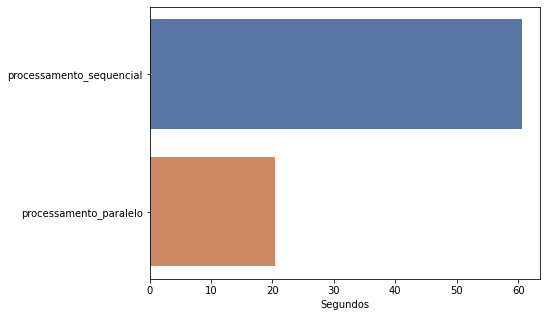

In [15]:
# Análise comparando processamento sequencial x paralelo
x = [processamento_sequencial,processamento_paralelo]
y = ['processamento_sequencial','processamento_paralelo']
plt.figure(figsize = (7, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.xlabel('Segundos')
plt.plot()